In [1]:
import keras,os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
SIZE = 244
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="FOD\TrainingSet",target_size=(SIZE,SIZE))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="FOD\TestSet", target_size=(SIZE,SIZE))

Found 1026 images belonging to 4 classes.
Found 208 images belonging to 4 classes.


In [3]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

In [4]:
model = Sequential()
model.add(Conv2D(input_shape=(SIZE,SIZE,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [5]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00001,amsgrad=True,
    name='Adam'
)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 244, 244, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 256)       2

In [7]:
vgg_16_model=model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'vgg16_1_Moiture_201.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True,
    save_weights_only=False, 
    mode='auto', 
    save_freq='epoch',
    options=None, 
)
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=30, 
    verbose=1,
    mode='auto', 
    baseline=None, 
    restore_best_weights=True
)

In [8]:
vgg_16_model = model.fit(
    x=traindata,
    batch_size=20,
    epochs=200,
    verbose=1, 
    callbacks=[checkpoint,early],
    validation_split=0.0,
    validation_data=testdata,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=4,
    validation_steps=4,
    validation_batch_size=None,
    validation_freq=1,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 1.6551 - accuracy: 0.3047 
Epoch 00001: val_loss improved from inf to 1.48348, saving model to vgg16_1_Moiture_200.h5
4/4 [==============================] - 95s 24s/step - loss: 1.6551 - accuracy: 0.3047 - val_loss: 1.4835 - val_accuracy: 0.2188
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.2031 
Epoch 00002: val_loss improved from 1.48348 to 1.39870, saving model to vgg16_1_Moiture_200.h5
4/4 [==============================] - 91s 23s/step - loss: 1.4673 - accuracy: 0.2031 - val_loss: 1.3987 - val_accuracy: 0.2344
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.3577 - accuracy: 0.3672 
Epoch 00003: val_loss improved from 1.39870 to 1.38027, saving model to vgg16_1_Moiture_200.h5
4/4 [==============================] - 90s 23s/step - loss: 1.3577 - accuracy: 0.3672 - val_loss: 1.3803 - val_accuracy: 0.2500
Epoch 4/200
4/4 [==============================] - ET

4/4 [==============================] - ETA: 0s - loss: 1.0009 - accuracy: 0.5625 
Epoch 00029: val_loss did not improve from 0.89675
4/4 [==============================] - 78s 20s/step - loss: 1.0009 - accuracy: 0.5625 - val_loss: 1.2137 - val_accuracy: 0.4844
Epoch 30/200
4/4 [==============================] - ETA: 0s - loss: 0.8194 - accuracy: 0.6094 
Epoch 00030: val_loss did not improve from 0.89675
4/4 [==============================] - 78s 20s/step - loss: 0.8194 - accuracy: 0.6094 - val_loss: 0.9442 - val_accuracy: 0.5781
Epoch 31/200
4/4 [==============================] - ETA: 0s - loss: 0.6982 - accuracy: 0.7188 
Epoch 00031: val_loss did not improve from 0.89675
4/4 [==============================] - 78s 19s/step - loss: 0.6982 - accuracy: 0.7188 - val_loss: 1.1040 - val_accuracy: 0.6016
Epoch 32/200
4/4 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.7031 
Epoch 00032: val_loss did not improve from 0.89675
4/4 [==============================] - 78s 20

Epoch 59/200
4/4 [==============================] - ETA: 0s - loss: 0.5888 - accuracy: 0.7347
Epoch 00059: val_loss did not improve from 0.55529
4/4 [==============================] - 64s 16s/step - loss: 0.5888 - accuracy: 0.7347 - val_loss: 0.6979 - val_accuracy: 0.6641
Epoch 60/200
4/4 [==============================] - ETA: 0s - loss: 0.7234 - accuracy: 0.6641 
Epoch 00060: val_loss did not improve from 0.55529
4/4 [==============================] - 78s 20s/step - loss: 0.7234 - accuracy: 0.6641 - val_loss: 0.7241 - val_accuracy: 0.7031
Epoch 61/200
4/4 [==============================] - ETA: 0s - loss: 0.5169 - accuracy: 0.7812 
Epoch 00061: val_loss did not improve from 0.55529
4/4 [==============================] - 78s 19s/step - loss: 0.5169 - accuracy: 0.7812 - val_loss: 0.6614 - val_accuracy: 0.7031
Epoch 62/200
4/4 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.7755
Epoch 00062: val_loss did not improve from 0.55529
4/4 [=============================

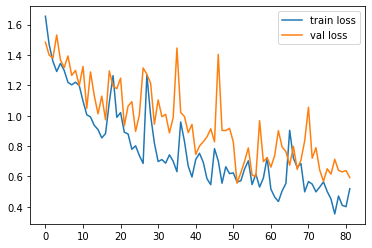

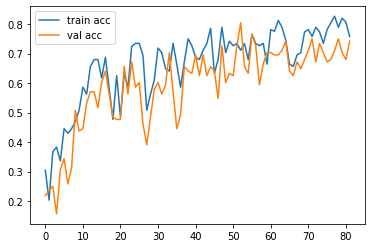

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(vgg_16_model.history['loss'], label='train loss')
plt.plot(vgg_16_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_16_model.history['accuracy'], label='train acc')
plt.plot(vgg_16_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')